<a href="https://www.kaggle.com/denizcanoguz/diabetes-feature-engineering?scriptVersionId=88483775" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Feature Engineering on Pima Indian Diabetes Dataset
---
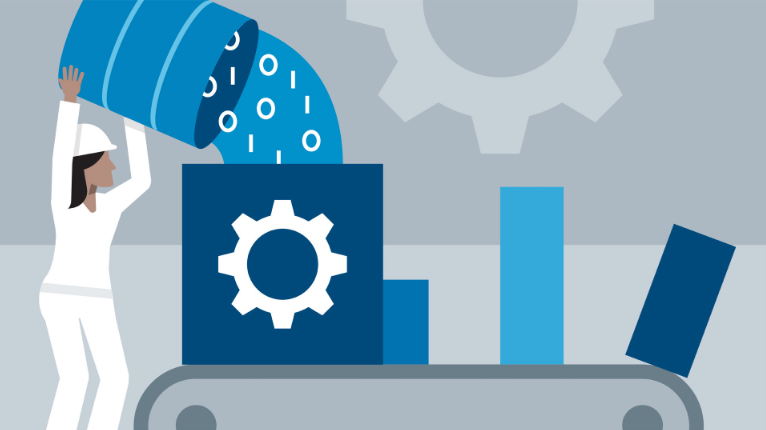

## Feature Engineering Definition
---

- Feature engineering: The process of creating new features from raw data to increase the predictive power of the learning algorithm. Engineered features become easily visible in the original feature set to capture additional information. 

- Feature selection: The process of selecting a fundamental subset of features to reduce the dimensionality of the training problem.

Normally feature engineering is applied first to create additional features and then feature selection is done to eliminate irrelevant, redundant or highly correlated features.

Feature engineering and selection is part of the modeling phase of the Team Data Science Process (TDSP). To learn more about TDSP and the data science lifecycle, see Data science lifecycle. [What is TDSP?](https://docs.microsoft.com/tr-tr/azure/architecture/data-science-process/overview)

What is feature engineering? 
The training data contains a matrix of rows and columns. Each row in the matrix is an observation or record. The columns of each row are properties that describe each record. The features specified in the experimental design should characterize the data patterns.

Most raw data fields can be used directly to train the model, but it is often necessary to create additional (designed) features for an advanced training dataset.

Designed features that enhance training provide information to better distinguish data patterns. But this process is an art. Sound and productive decisions often require domain expertise.

### Under the heading of feature engineering, the following operations are usually performed on a dataset:

- Exploratory Data Analysis (E.D.A)
- Outlier Analysis and Operations
- Missing Values Analysis and Operations
- Encoding and Scaling Operations
- Feature Extraction and Feature Interaction Operations
 

After these processes, it is aimed to make our raw data easier to understand for machine learning models. In this study, we will apply the Feature Engineering processes and finally set up a simple model for our data set. Since the purpose of our study is Feature Engineering, the model building phase will be done so that we can see what is wanted to be done as a result of these processes.



# We Have Business Problem:
---
     It is desired to develop a machine learning model that can predict whether people have diabetes when their characteristics are specified. You are expected to perform the necessary data analysis and feature engineering steps before developing the model.

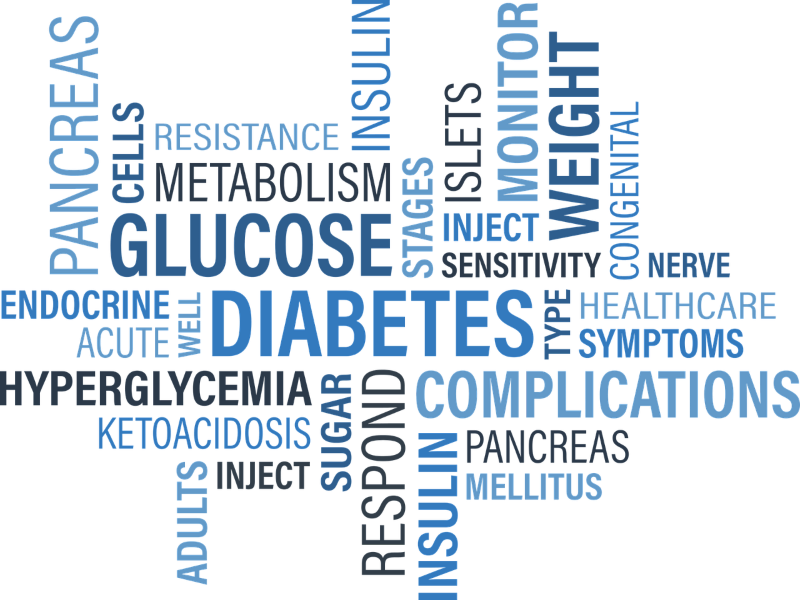
# Dataset Story:
---
     The dataset is part of the large dataset held at the National Institutes of Diabetes-Digestive-Kidney Diseases in the USA. Data used for diabetes research on Pima Indian women aged 21 and over living in Phoenix, the 5th largest city of the State of Arizona in the USA. The target variable is specified as "outcome"; 1 indicates positive diabetes test result, 0 indicates negative.

# Variables :
* Pregnancies: Number of times pregnant
* Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* BloodPressure: Diastolic blood pressure (mm Hg)
* SkinThickness: Triceps skin fold thickness (mm)
* Insulin: 2-Hour serum insulin (mu U/ml)
* BMI: Body mass index (weight in kg/(height in m)^2)
* DiabetesPedigreeFunction: Diabetes pedigree function
* Age: Age (years)
* Outcome: Class variable ( 0 - 1)

# Project Tasks
---

## Task 1 : Exploratory Data Analysis (E.D.A)
---

### Necessery Import

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set_theme()
from _plotly_utils import png
from matplotlib import pyplot as plt
import missingno as msno
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import RobustScaler

### Step 1: Review the general picture.
---

* Let's get our data set.

In [2]:
df_ = pd.read_csv("../input/pima-indians-diabetes-database/diabetes.csv")
df = df_.copy()
df.columns = [col.upper() for col in df.columns]

In [3]:
def check_df(dataframe, head=5, tail=5, quan=False):
    print("##################### Shape #####################")
    print(dataframe.shape,"\n")
    print("##################### Types #####################")
    print(dataframe.dtypes,"\n")
    print("##################### Head #####################")
    print(dataframe.head(head),"\n")
    print("##################### Tail #####################")
    print(dataframe.tail(tail),"\n")
    print("##################### NA #####################")
    print(dataframe.isnull().sum(),"\n")

    if quan:
        print("##################### Quantiles #####################")
        print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)
check_df(df)

##################### Shape #####################
(768, 9) 

##################### Types #####################
PREGNANCIES                   int64
GLUCOSE                       int64
BLOODPRESSURE                 int64
SKINTHICKNESS                 int64
INSULIN                       int64
BMI                         float64
DIABETESPEDIGREEFUNCTION    float64
AGE                           int64
OUTCOME                       int64
dtype: object 

##################### Head #####################
   PREGNANCIES  GLUCOSE  BLOODPRESSURE  SKINTHICKNESS  INSULIN   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DIABETESPEDIGREEFUNCTION  AGE  OUTCOME  
0                     0

### Step 2: Capture numeric and categorical variables.
---

In [4]:
def grab_col_names(dataframe, cat_th=3, car_th=10):
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 768
Variables: 9
cat_cols: 1
num_cols: 8
cat_but_car: 0
num_but_cat: 1


### Step 3: Analyze numeric and categorical variables.
---

- Numeric variable analysis

count    768.000000
mean       3.845052
std        3.369578
min        0.000000
5%         0.000000
10%        0.000000
20%        1.000000
30%        1.000000
40%        2.000000
50%        3.000000
60%        4.000000
70%        5.000000
80%        7.000000
90%        9.000000
95%       10.000000
99%       13.000000
max       17.000000
Name: PREGNANCIES, dtype: float64




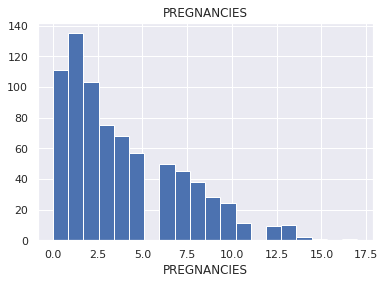



count    768.000000
mean     120.894531
std       31.972618
min        0.000000
5%        79.000000
10%       85.000000
20%       95.000000
30%      102.000000
40%      109.000000
50%      117.000000
60%      125.000000
70%      134.000000
80%      147.000000
90%      167.000000
95%      181.000000
99%      196.000000
max      199.000000
Name: GLUCOSE, dtype: float64




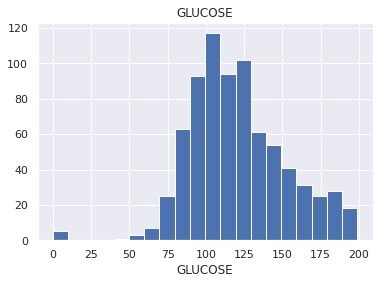



count    768.000000
mean      69.105469
std       19.355807
min        0.000000
5%        38.700000
10%       54.000000
20%       60.000000
30%       64.000000
40%       68.000000
50%       72.000000
60%       74.000000
70%       78.000000
80%       82.000000
90%       88.000000
95%       90.000000
99%      106.000000
max      122.000000
Name: BLOODPRESSURE, dtype: float64




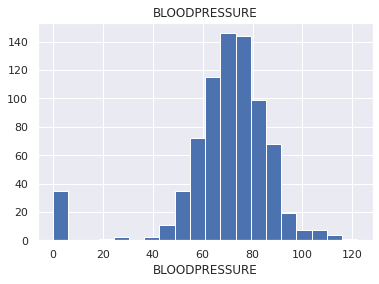



count    768.000000
mean      20.536458
std       15.952218
min        0.000000
5%         0.000000
10%        0.000000
20%        0.000000
30%        8.200000
40%       18.000000
50%       23.000000
60%       27.000000
70%       31.000000
80%       35.000000
90%       40.000000
95%       44.000000
99%       51.330000
max       99.000000
Name: SKINTHICKNESS, dtype: float64




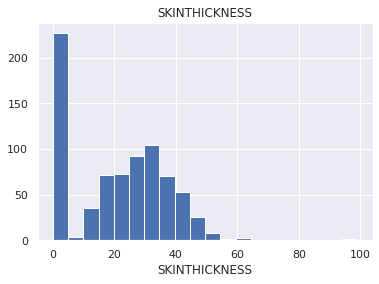



count    768.000000
mean      79.799479
std      115.244002
min        0.000000
5%         0.000000
10%        0.000000
20%        0.000000
30%        0.000000
40%        0.000000
50%       30.500000
60%       72.200000
70%      106.000000
80%      150.000000
90%      210.000000
95%      293.000000
99%      519.900000
max      846.000000
Name: INSULIN, dtype: float64




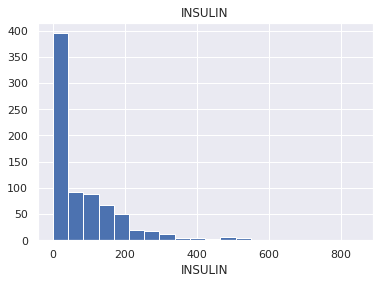



count    768.000000
mean      31.992578
std        7.884160
min        0.000000
5%        21.800000
10%       23.600000
20%       25.900000
30%       28.200000
40%       30.100000
50%       32.000000
60%       33.700000
70%       35.490000
80%       37.800000
90%       41.500000
95%       44.395000
99%       50.759000
max       67.100000
Name: BMI, dtype: float64




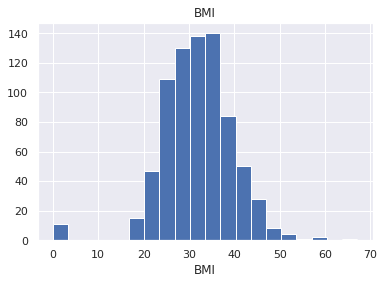



count    768.000000
mean       0.471876
std        0.331329
min        0.078000
5%         0.140350
10%        0.165000
20%        0.219400
30%        0.259000
40%        0.302800
50%        0.372500
60%        0.454200
70%        0.563700
80%        0.687000
90%        0.878600
95%        1.132850
99%        1.698330
max        2.420000
Name: DIABETESPEDIGREEFUNCTION, dtype: float64




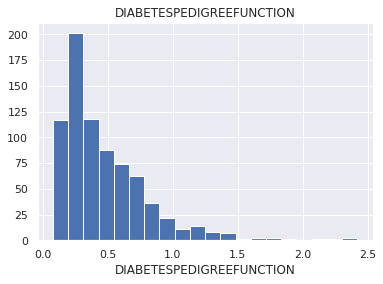



count    768.000000
mean      33.240885
std       11.760232
min       21.000000
5%        21.000000
10%       22.000000
20%       23.000000
30%       25.000000
40%       27.000000
50%       29.000000
60%       33.000000
70%       38.000000
80%       42.600000
90%       51.000000
95%       58.000000
99%       67.000000
max       81.000000
Name: AGE, dtype: float64




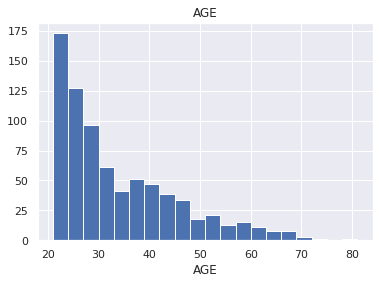

In [5]:
num_cols
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)
    print("\n")
    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)
        print("\n")
        

for col in num_cols:
    num_summary(df, col, plot=True)

---

- Categorical variable analysis

In [6]:
cat_cols
# ['OUTCOME']

def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show()
cat_summary(df,"OUTCOME")

   OUTCOME      Ratio
0      500  65.104167
1      268  34.895833
##########################################


### Step 4: Perform target variable analysis.
---
 - (Average of target variable by categorical variable, average of numeric variables by target variable)
 - Our target variable is "OUTCOME"


In [7]:
df.groupby("OUTCOME").agg({"PREGNANCIES":"mean","GLUCOSE":"mean",
                           "BLOODPRESSURE":"mean","SKINTHICKNESS":"mean",
                           "INSULIN":"mean","BMI":"mean",
                           "DIABETESPEDIGREEFUNCTION":"mean","AGE":"mean"}).sort_values("OUTCOME")

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE
OUTCOME,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


### Step 5: Perform an outlier observation analysis.
---

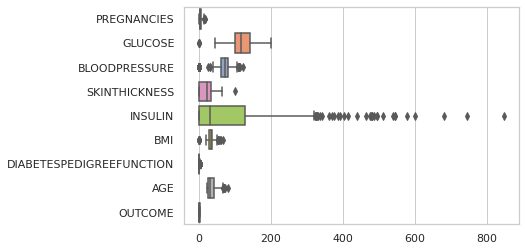

In [8]:
sns.set_theme(style="whitegrid")
sns.boxplot(data=df, orient="h", palette="Set2")
plt.show()

In [9]:
def outlier_thresholds(dataframe, col_name, q1=0.10, q3=0.90):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit
for col in num_cols:
    print(col, outlier_thresholds(df, col))

PREGNANCIES (-13.5, 22.5)
GLUCOSE (-38.0, 290.0)
BLOODPRESSURE (3.0, 139.0)
SKINTHICKNESS (-60.0, 100.0)
INSULIN (-315.0, 525.0)
BMI (-3.2499999999999964, 68.35)
DIABETESPEDIGREEFUNCTION (-0.9054, 1.949)
AGE (-21.5, 94.5)


In [10]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False
for col in num_cols:
    print(col, check_outlier(df, col))

PREGNANCIES False
GLUCOSE False
BLOODPRESSURE True
SKINTHICKNESS False
INSULIN True
BMI False
DIABETESPEDIGREEFUNCTION True
AGE False


### Step 6: Perform incomplete observation analysis.
---

In [11]:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")

    if na_name:
        return na_columns
missing_values_table(df)

Empty DataFrame
Columns: [n_miss, ratio]
Index: []


### Step 7: Perform correlation analysis.
---

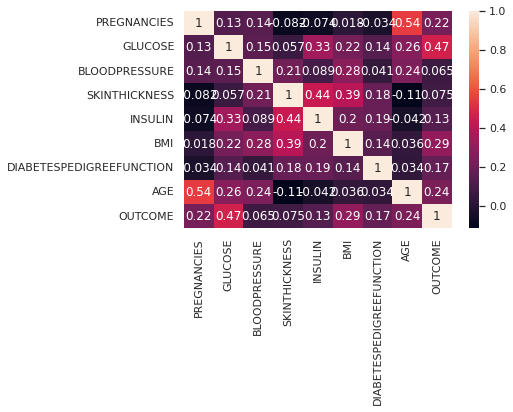

In [12]:
cor = df.corr(method='pearson')
cor
sns.heatmap(cor, annot=True)
plt.show()

## Task 2 : Feature Engineering
---

### Step 1: Take the necessary actions for missing and outlier values.
 - There are no incomplete observations in the data set, but observation units containing a value of 0 in glucose, insulin, etc. may refer to the missing value. For example, if you want to use a person's glucose or insulin value will not be 0. With this in mind, you can assign zero values as NaNs in the relevant values and then apply operations to the missing values.

In [13]:
# NaN assignment operations with values of 0
df["GLUCOSE"].replace({0:np.nan},inplace=True)
df["BLOODPRESSURE"].replace({0:np.nan},inplace=True)
df["SKINTHICKNESS"].replace({0:np.nan},inplace=True)
df["INSULIN"].replace({0:np.nan},inplace=True)
df["BMI"].replace({0:np.nan},inplace=True)
df["AGE"].replace({0:np.nan},inplace=True)

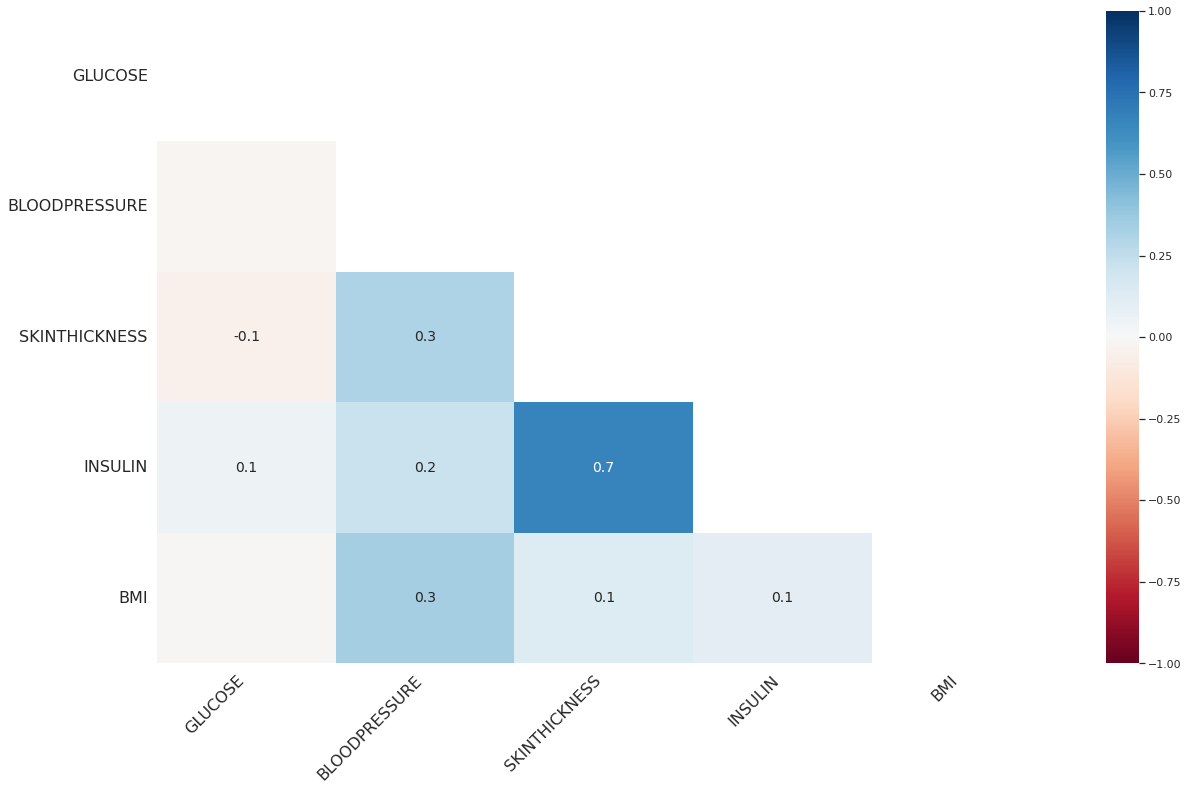

In [14]:
# heatmap
msno.heatmap(df)
plt.show()

In [15]:
# let's see missing values
missing_values_table(df)

               n_miss  ratio
INSULIN           374  48.70
SKINTHICKNESS     227  29.56
BLOODPRESSURE      35   4.56
BMI                11   1.43
GLUCOSE             5   0.65


In [16]:
# We do one hot encoding because it is necessary to be able to do a predictive filling process.
dff = pd.get_dummies(df[cat_cols + num_cols], drop_first=True)
dff.head()

,OUTCOME,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE
0,1,6,148.0,72.0,35.0,NaN,33.6,0.627,50
1,0,1,85.0,66.0,29.0,NaN,26.6,0.351,31
2,1,8,183.0,64.0,NaN,NaN,23.3,0.672,32
3,0,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,1,0,137.0,40.0,35.0,168.0,43.1,2.288,33


In [17]:
# standardization of variables
scaler = RobustScaler()
dff = pd.DataFrame(scaler.fit_transform(dff), columns=dff.columns)
dff.head()

,OUTCOME,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE
0,1.0,0.6,0.738095,0.000,0.428571,NaN,0.142857,0.665359,1.235294
1,0.0,-0.4,-0.761905,-0.375,0.000000,NaN,-0.626374,-0.056209,0.117647
2,1.0,1.0,1.571429,-0.500,NaN,NaN,-0.989011,0.783007,0.176471
3,0.0,-0.4,-0.666667,-0.375,-0.428571,-0.272527,-0.461538,-0.537255,-0.470588
4,1.0,-0.6,0.476190,-2.000,0.428571,0.378022,1.186813,5.007843,0.235294


In [18]:
# knn implementation.
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=33)
dff = pd.DataFrame(imputer.fit_transform(dff), columns=dff.columns)
dff.head()

,OUTCOME,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE
0,1.0,0.6,0.738095,0.000,0.428571,0.861805,0.142857,0.665359,1.235294
1,0.0,-0.4,-0.761905,-0.375,0.000000,-0.449950,-0.626374,-0.056209,0.117647
2,1.0,1.0,1.571429,-0.500,-0.073593,0.668132,-0.989011,0.783007,0.176471
3,0.0,-0.4,-0.666667,-0.375,-0.428571,-0.272527,-0.461538,-0.537255,-0.470588
4,1.0,-0.6,0.476190,-2.000,0.428571,0.378022,1.186813,5.007843,0.235294


In [19]:
dff = pd.DataFrame(scaler.inverse_transform(dff), columns=dff.columns)
dff.head()

,OUTCOME,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE
0,1.0,6.0,148.0,72.0,35.000000,223.030303,33.6,0.627,50.0
1,0.0,1.0,85.0,66.0,29.000000,73.818182,26.6,0.351,31.0
2,1.0,8.0,183.0,64.0,27.969697,201.000000,23.3,0.672,32.0
3,0.0,1.0,89.0,66.0,23.000000,94.000000,28.1,0.167,21.0
4,1.0,0.0,137.0,40.0,35.000000,168.000000,43.1,2.288,33.0


In [20]:
# let's see the assignments in main df according to the forecast
df["INSULIN"] = dff[["INSULIN"]]
df["SKINTHICKNESS"] = dff[["SKINTHICKNESS"]]
df["BLOODPRESSURE"] = dff[["BLOODPRESSURE"]]
df["BMI"] = dff[["BMI"]]
df["GLUCOSE"] = dff[["GLUCOSE"]]

In [21]:
# we filled our missing values with the assignment process according to the estimate
missing_values_table(df)

Empty DataFrame
Columns: [n_miss, ratio]
Index: []


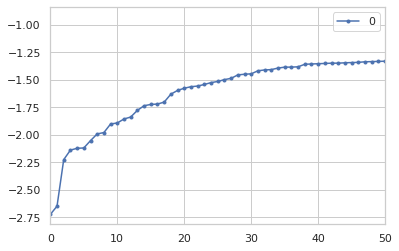

In [22]:
# finding and deleting outliers based on the principle of neighborliness
clf = LocalOutlierFactor(n_neighbors=5)
clf.fit_predict(df)

df_scores = clf.negative_outlier_factor_
df_scores[0:30]
# df_scores = -df_scores
np.sort(df_scores)[0:30]

scores = pd.DataFrame(np.sort(df_scores))
scores.plot(stacked=True, xlim=[0, 50], style='.-')
plt.show()

In [23]:
th = np.sort(df_scores)[3] # I want to delete distant neighbors. let's make a selection operation
df[df_scores < th]
df[df_scores < th].shape
df.describe([0.01, 0.05, 0.75, 0.90, 0.99]).T
clf_index = df[df_scores < th].index
df.drop(index=clf_index, inplace=True)

### Step 2: Create new variables.
---

In [24]:
#INSULIN/AGE
df["INSULIN/AGE"]=df["INSULIN"]/df["AGE"]
#BMI/AGE
df["BMI/AGE"]=df["BMI"]/df["AGE"]
#PREGNANCIES/AGE
df["PREGNANCIES/AGE"]=df["PREGNANCIES"]/df["AGE"]
#INS*GLU
df["INS*GLU"]=df["INSULIN"]* df["GLUCOSE"]
df.drop(["AGE"],axis = 1, inplace = True)

In [25]:
# Classification for BMI
df['NEW_BMI_CAT'] = pd.cut(x = df['BMI'], bins = [0,18.5, 24.9, 29.9, 100], labels = ["UNDER WEIGHT",
                                                                                  "NORMALY WEIGHT",
                                                                                   "OVER WEIGHT",
                                                                                   "OBESE"])
df.groupby("NEW_BMI_CAT")["OUTCOME"].mean()

NEW_BMI_CAT
UNDER WEIGHT      0.000000
NORMALY WEIGHT    0.068627
OVER WEIGHT       0.217391
OBESE             0.458947
Name: OUTCOME, dtype: float64

In [26]:
# Classification for BP
df['NEW_BP_CAT'] = pd.cut(x = df['BLOODPRESSURE'], bins = [0,80, 84, 90, 122], labels = ["OPTIMAL PRESSURE",
                                                                                                 "NORMAL PRESSURE",
                                                                                                 "HIGH-NORMAL PRESSURE",
                                                                                                 "HIGH PRESSURE"])
df.groupby("NEW_BP_CAT")["OUTCOME"].mean()

NEW_BP_CAT
OPTIMAL PRESSURE        0.313333
NORMAL PRESSURE         0.481481
HIGH-NORMAL PRESSURE    0.459459
HIGH PRESSURE           0.459459
Name: OUTCOME, dtype: float64

In [27]:
df.head()

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,OUTCOME,INSULIN/AGE,BMI/AGE,PREGNANCIES/AGE,INS*GLU,NEW_BMI_CAT,NEW_BP_CAT
0,6,148.0,72.0,35.000000,223.030303,33.6,0.627,1,4.460606,0.672000,0.120000,33008.484848,OBESE,OPTIMAL PRESSURE
1,1,85.0,66.0,29.000000,73.818182,26.6,0.351,0,2.381232,0.858065,0.032258,6274.545455,OVER WEIGHT,OPTIMAL PRESSURE
2,8,183.0,64.0,27.969697,201.000000,23.3,0.672,1,6.281250,0.728125,0.250000,36783.000000,NORMALY WEIGHT,OPTIMAL PRESSURE
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,0,4.476190,1.338095,0.047619,8366.000000,OVER WEIGHT,OPTIMAL PRESSURE
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,1,5.090909,1.306061,0.000000,23016.000000,OBESE,OPTIMAL PRESSURE


In [28]:
df.shape

(765, 14)

### Step 3: Perform encoding.
---

In [29]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 765
Variables: 14
cat_cols: 1
num_cols: 13
cat_but_car: 0
num_but_cat: 1


In [30]:
#   let's do our RARE analysis
def rare_analyser(dataframe, target, cat_cols):
    for col in cat_cols:
        print(col, ":", len(dataframe[col].value_counts()))
        print(pd.DataFrame({"COUNT": dataframe[col].value_counts(),
                            "RATIO": dataframe[col].value_counts() / len(dataframe),
                            "TARGET_MEAN": dataframe.groupby(col)[target].mean()}), end="\n\n\n")
rare_analyser(df, "OUTCOME", cat_cols)

OUTCOME : 2
   COUNT     RATIO  TARGET_MEAN
0    500  0.653595          0.0
1    265  0.346405          1.0




In [31]:
# One Hot encoding
def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe
ohe_cols = [col for col in df.columns if 10 >= df[col].nunique() > 2]

df = one_hot_encoder(df, ohe_cols)

In [32]:
df.head()

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,OUTCOME,INSULIN/AGE,BMI/AGE,PREGNANCIES/AGE,INS*GLU,NEW_BMI_CAT_NORMALY WEIGHT,NEW_BMI_CAT_OVER WEIGHT,NEW_BMI_CAT_OBESE,NEW_BP_CAT_NORMAL PRESSURE,NEW_BP_CAT_HIGH-NORMAL PRESSURE,NEW_BP_CAT_HIGH PRESSURE
0,6,148.0,72.0,35.000000,223.030303,33.6,0.627,1,4.460606,0.672000,0.120000,33008.484848,0,0,1,0,0,0
1,1,85.0,66.0,29.000000,73.818182,26.6,0.351,0,2.381232,0.858065,0.032258,6274.545455,0,1,0,0,0,0
2,8,183.0,64.0,27.969697,201.000000,23.3,0.672,1,6.281250,0.728125,0.250000,36783.000000,1,0,0,0,0,0
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,0,4.476190,1.338095,0.047619,8366.000000,0,1,0,0,0,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,1,5.090909,1.306061,0.000000,23016.000000,0,0,1,0,0,0


In [33]:
df.shape

(765, 18)

### Step 4: Standardize for numeric variables.
---
At this stage we can use 3 methods:
- min/max scaler
- standard scaler
- robust scaler

We will perform scale operation with Robust method.

Robust Scaler works similarly to Normalization. It may give better results on data with outliers. Again, it is similar to the data distribution, but outliers are excluded. The median value is eliminated for later use and the values ​​are placed in the 1st and 3rd quartile range.

In [34]:
scaler = RobustScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df.head()

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,OUTCOME,INSULIN/AGE,BMI/AGE,PREGNANCIES/AGE,INS*GLU,NEW_BMI_CAT_NORMALY WEIGHT,NEW_BMI_CAT_OVER WEIGHT,NEW_BMI_CAT_OBESE,NEW_BP_CAT_NORMAL PRESSURE,NEW_BP_CAT_HIGH-NORMAL PRESSURE,NEW_BP_CAT_HIGH PRESSURE
0,0.6,0.756098,0.000,0.534435,0.936191,0.175824,0.666667,1.0,0.151140,-0.728769,0.198095,1.061274,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.4,-0.780488,-0.375,-0.011019,-0.650661,-0.593407,-0.052083,0.0,-0.648906,-0.360836,-0.503840,-0.626685,0.0,1.0,-1.0,0.0,0.0,0.0
2,1.0,1.609756,-0.500,-0.104683,0.701901,-0.956044,0.783854,1.0,0.851639,-0.617785,1.238095,1.299593,1.0,0.0,-1.0,0.0,0.0,0.0
3,-0.4,-0.682927,-0.375,-0.556474,-0.436030,-0.428571,-0.531250,0.0,0.157136,0.588398,-0.380952,-0.494632,0.0,1.0,-1.0,0.0,0.0,0.0
4,-0.6,0.487805,-2.000,0.534435,0.350951,1.219780,4.992187,1.0,0.393651,0.525051,-0.761905,0.430357,0.0,0.0,0.0,0.0,0.0,0.0


### Step 5: Create a model.
---

In [35]:
y = df["OUTCOME"]
X = df.drop(["OUTCOME"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=46).fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
accuracy_score(y_pred, y_test) 

0.8391304347826087

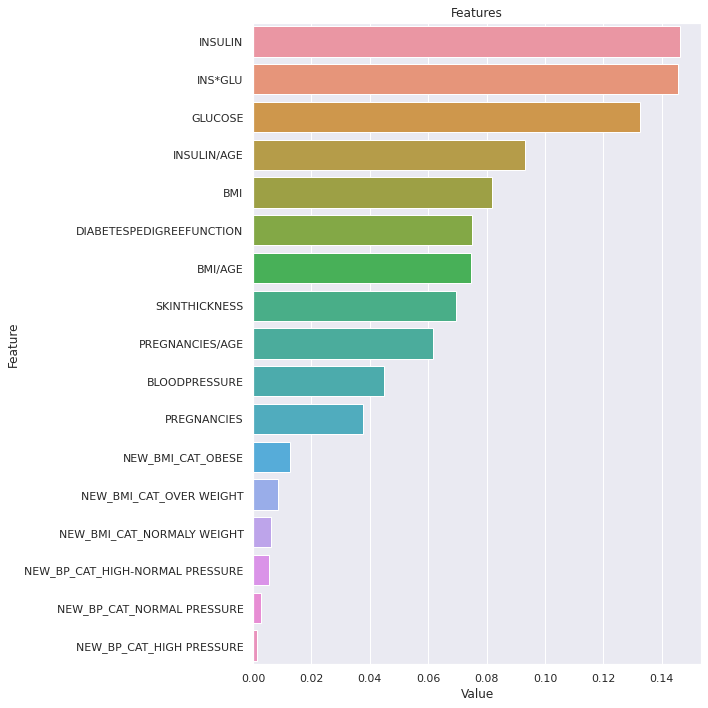

In [36]:
# How are the new variables we've created?

def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                      ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')


plot_importance(rf_model, X_train)

---
### I would like to thank [VBO](https://www.veribilimiokulu.com/) , my trainer [Vahit Keskin](https://www.kaggle.com/mvahit) and my mentor [Oğuz Erdoğan](https://www.kaggle.com/oguzerdo) who contributed to the making of this study.
